# Step 1: Reading and Understanding the Data¶



### Importing and Understanding the data


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')


In [2]:
#Importing the data
train_data= pd.read_csv(r"C:\Users\saval\Downloads\train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Preparation

In [3]:
train_data.shape

(891, 12)

In [4]:
# Checking if there is any null values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Handling missing values

In [5]:
null_values = round(train_data.isnull().sum()*100/len(train_data),2)
null_values

PassengerId     0.00
Survived        0.00
Pclass          0.00
Name            0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Ticket          0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

In [6]:
# We will drop column cabin as it has more than 50% null values
train_data=train_data.drop(["Cabin"],axis=1)

In [7]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [8]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
median=train_data["Age"].median()
train_data["Age"].fillna(median,inplace=True)

In [10]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [11]:
mode=train_data["Embarked"].mode()[0]
train_data["Embarked"].fillna(mode,inplace=True)

In [12]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [13]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.361582,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [14]:
train_data.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Embarked         3
dtype: int64

In [15]:
id_cols=["PassengerId","Name","Ticket"]
cate_cols=["Survived","Pclass","Sex","SibSp","Parch","Embarked"]
con_cols=["Age","Fare"]


In [16]:
# remove unnecessory columns
train_data.drop(id_cols,axis=1,inplace=True)


In [17]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [18]:
train_data.Sex=train_data.Sex.map({"male":0,"female":1})
train_data.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,71.2833,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


**Outlier Handling**


#### Analyse data

Age


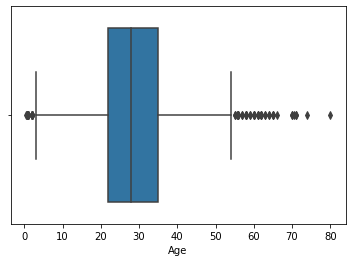

Fare


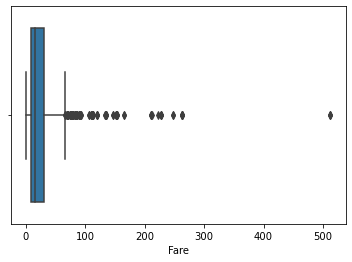

In [19]:
for i in con_cols:
    print(i)
    sns.boxplot(train_data[i])
    plt.show()

In [20]:
# Handling outliers for Age column
train_data["Age"].describe()

count    891.000000
mean      29.361582
std       13.019697
min        0.420000
25%       22.000000
50%       28.000000
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [21]:
q1=22
q3=35
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
train_data["Age"]=np.where(train_data["Age"]>upper_bound,upper_bound,train_data["Age"])
train_data["Age"]=np.where(train_data["Age"]<lower_bound,lower_bound,train_data["Age"])

In [22]:
# Handling outliers for Fare column
train_data["Fare"].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [23]:
q1=7.910400
q3=31
iqr=q3-q1
lower_bound=q1-1.5*iqr
upper_bound=q3+1.5*iqr
train_data["Fare"]=np.where(train_data["Fare"]>upper_bound,upper_bound,train_data["Fare"])
train_data["Fare"]=np.where(train_data["Fare"]<lower_bound,lower_bound,train_data["Fare"])

### Step-2 EDA

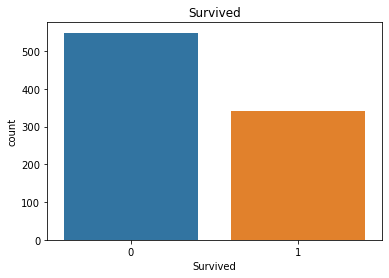

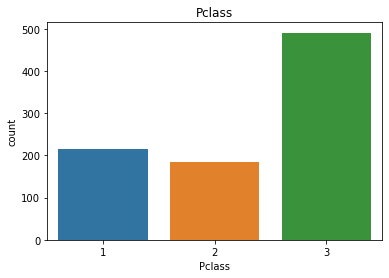

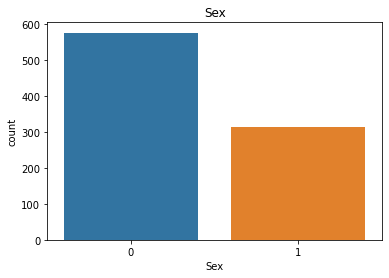

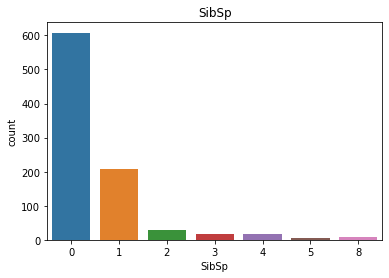

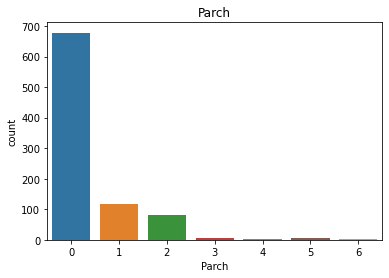

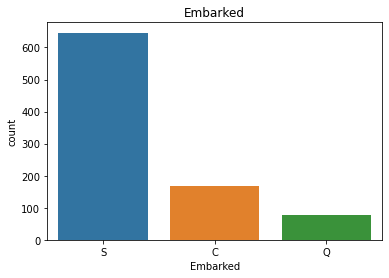

In [24]:
for i in cate_cols:
    sns.countplot(train_data[i])
    plt.title(i)
    plt.show()    

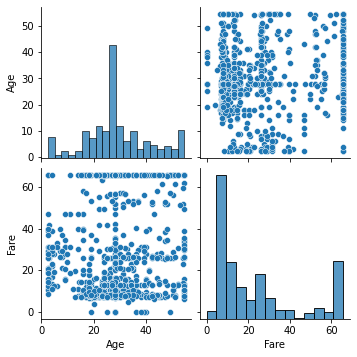

In [25]:
# Creating pairplot for continous variables
sns.pairplot(train_data[con_cols])
plt.show()

#### Insight:
- There is no correlation between Age and Fare.
    

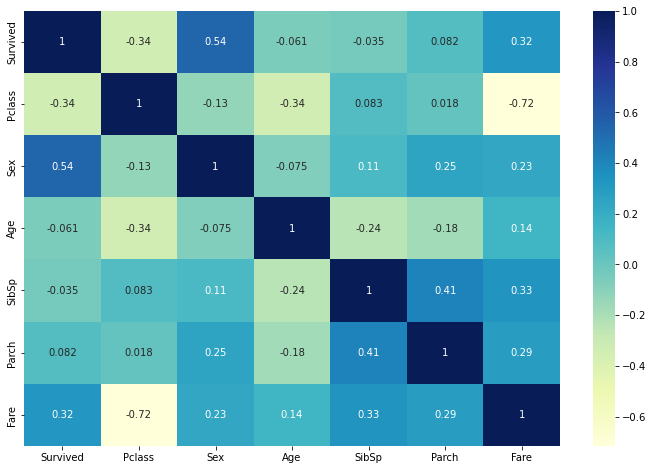

In [26]:
plt.figure(figsize=(12,8))
sns.heatmap(train_data.corr(),annot=True,cmap="YlGnBu")
plt.show()

#### Insight:
- Fare column is highly correlated with Survived.
- Pclass column is negatively correlated with Survived.

In [27]:
train_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.0,1,0,7.2500,S
1,1,1,1,38.0,1,0,65.6344,C
2,1,3,1,26.0,0,0,7.9250,S
3,1,1,1,35.0,1,0,53.1000,S
4,0,3,0,35.0,0,0,8.0500,S


### Step-3 Data Preparation

#### Dummy Creation

In [28]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


In [29]:
# Creating dummy variables for column Embarked
train_data["Pclass"]=train_data["Pclass"].astype('object')
train_data["SibSp"]=train_data["SibSp"].astype('object')
train_data["Parch"]=train_data["Parch"].astype('object')


In [30]:
cols=["Pclass","SibSp","Parch","Embarked"]
dummies=pd.get_dummies(train_data[cols],drop_first=True)
train_data1=pd.concat([train_data,dummies],axis=1)

In [31]:
dummies

,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [32]:
train_data1=train_data1.drop(cols,axis=1)

In [33]:
train_data1

,Survived,Sex,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,0,0,22.0,7.2500,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1
1,1,1,38.0,65.6344,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,26.0,7.9250,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
3,1,1,35.0,53.1000,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1
4,0,0,35.0,8.0500,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,0,27.0,13.0000,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
887,1,1,19.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
888,0,1,28.0,23.4500,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,1
889,1,0,26.0,30.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [34]:
train_data1.shape

(891, 20)

### Step 4: Splitting the Data into Training and Testing Sets


In [35]:
X=train_data1.drop(["Survived"],axis=1)
Y=train_data1[["Survived"]]

#### Scaling

In [36]:
X=(X-X.mean())/X.std()

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,Y,train_size=0.7,test_size=0.3,random_state=100)

In [38]:
print("X_train Shape:", X_train.shape)
print("Y_train Shape:", y_train.shape)
print("X_test Shape:", X_test.shape)
print("Y_test Shape:", y_test.shape)

X_train Shape: (623, 19)
Y_train Shape: (623, 1)
X_test Shape: (268, 19)
Y_test Shape: (268, 1)


#### Feature selection

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

estimator=LogisticRegression()
estimator.fit(X_train,y_train)

selector=RFE(estimator,n_features_to_select=10)
selector=selector.fit(X_train,y_train)

In [40]:
list(zip(X_train.columns,selector.support_,selector.ranking_))


[('Sex', True, 1),
 ('Age', True, 1),
 ('Fare', True, 1),
 ('Pclass_2', True, 1),
 ('Pclass_3', True, 1),
 ('SibSp_1', False, 8),
 ('SibSp_2', False, 3),
 ('SibSp_3', False, 2),
 ('SibSp_4', False, 4),
 ('SibSp_5', True, 1),
 ('SibSp_8', True, 1),
 ('Parch_1', False, 6),
 ('Parch_2', True, 1),
 ('Parch_3', False, 9),
 ('Parch_4', True, 1),
 ('Parch_5', True, 1),
 ('Parch_6', False, 10),
 ('Embarked_Q', False, 7),
 ('Embarked_S', False, 5)]

In [41]:
selector=selector.fit(X_train,y_train)
selector.support_


array([ True,  True,  True,  True,  True, False, False, False, False,
        True,  True, False,  True, False,  True,  True, False, False,
       False])

In [42]:
cols_retain=list(X_train.columns[selector.support_])

In [43]:
X_train=X_train[cols_retain]
X_test=X_test[cols_retain]

In [44]:
X_train.shape

(623, 10)

### Building model using statsmodel, for the detailed statistics

#### Model-1

In [45]:
import statsmodels.api as sm
X_train_sm=sm.add_constant(X_train)
X_test_sm=sm.add_constant(X_test,has_constant="add")
print(X_train_sm.shape,X_test_sm.shape)
model1=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model1.summary()


(623, 11) (268, 11)


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      612
Model Family:                Binomial   Df Model:                           10
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -266.26
Date:                Thu, 16 Jun 2022   Deviance:                       532.51
Time:                        10:40:06   Pearson chi2:                     619.
No. Iterations:                    22                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.2064    405.041     -0.003      0.998    -795.072     792.659
Sex            1.3519      0.116     11.684      0.000       1.125       1.579
Age           -0.4250      0.125     -3.390      0.001      -0.671      -0.179
Fare           0.2959      0.171      1.732      0.083      -0.039       0.631
Pclass_2      -0.2588      0.158     -1.640      0.101      -0.568       0.051
Pclass_3      -0.8913      0.211     -4.232      0.000      -1.304      -0.479
SibSp_5       -1.6790   2577.184     -0.001      0.999   -5052.867    5049.509
SibSp_8       -2.0269   2623.824     -0.001      0.999   -5144.628    5140.575
Parch_2       -0.2893      0.117     -2.476      0.013      -0.518      -0.060
Parch_4       -1.5460   2314.972     -0.001      0.999   -4538.807    4535.715
Parch_5       -1.7333   2918.801     -0.001      1.000   -5722.479    5719.012
==============================================================================
"""

#### Model-2

In [46]:
X_train_sm=X_train_sm.drop(["SibSp_5"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model2=sm.GLM(y_train,X_train_sm,family = sm.families.Binomial()).fit()
model2.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      613
Model Family:                Binomial   Df Model:                            9
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -267.40
Date:                Thu, 16 Jun 2022   Deviance:                       534.80
Time:                        10:40:06   Pearson chi2:                     625.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -1.0733    215.446     -0.005      0.996    -423.340     421.193
Sex            1.3573      0.115     11.754      0.000       1.131       1.584
Age           -0.4261      0.125     -3.397      0.001      -0.672      -0.180
Fare           0.2713      0.170      1.599      0.110      -0.061       0.604
Pclass_2      -0.2730      0.157     -1.737      0.082      -0.581       0.035
Pclass_3      -0.9237      0.209     -4.421      0.000      -1.333      -0.514
SibSp_8       -1.9245   1588.610     -0.001      0.999   -3115.542    3111.693
Parch_2       -0.3138      0.115     -2.722      0.006      -0.540      -0.088
Parch_4       -1.4776   1401.703     -0.001      0.999   -2748.765    2745.810
Parch_5       -1.6562   1767.239     -0.001      0.999   -3465.380    3462.068
==============================================================================
"""

#### Model-3

In [47]:
X_train_sm=X_train_sm.drop(["SibSp_8"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model3=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      614
Model Family:                Binomial   Df Model:                            8
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -269.40
Date:                Thu, 16 Jun 2022   Deviance:                       538.79
Time:                        10:40:06   Pearson chi2:                     637.
No. Iterations:                    21                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.9235    162.315     -0.006      0.995    -319.056     317.209
Sex            1.3616      0.116     11.762      0.000       1.135       1.588
Age           -0.4548      0.125     -3.647      0.000      -0.699      -0.210
Fare           0.1952      0.164      1.193      0.233      -0.126       0.516
Pclass_2      -0.3207      0.154     -2.080      0.038      -0.623      -0.018
Pclass_3      -1.0170      0.202     -5.041      0.000      -1.412      -0.622
Parch_2       -0.3501      0.114     -3.073      0.002      -0.573      -0.127
Parch_4       -1.4717   1397.295     -0.001      0.999   -2740.120    2737.176
Parch_5       -1.6476   1764.545     -0.001      0.999   -3460.092    3456.796
==============================================================================
"""

#### Model-4

In [48]:
X_train_sm=X_train_sm.drop(["Parch_4"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model4=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      615
Model Family:                Binomial   Df Model:                            7
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -271.38
Date:                Thu, 16 Jun 2022   Deviance:                       542.76
Time:                        10:40:06   Pearson chi2:                     646.
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8380     80.414     -0.010      0.992    -158.447     156.770
Sex            1.3529      0.115     11.743      0.000       1.127       1.579
Age           -0.4754      0.124     -3.837      0.000      -0.718      -0.233
Fare           0.1705      0.163      1.046      0.295      -0.149       0.490
Pclass_2      -0.3327      0.154     -2.160      0.031      -0.635      -0.031
Pclass_3      -1.0525      0.201     -5.235      0.000      -1.447      -0.658
Parch_2       -0.3407      0.114     -2.995      0.003      -0.564      -0.118
Parch_5       -1.5667   1071.043     -0.001      0.999   -2100.772    2097.638
==============================================================================
"""

#### Model-5

In [51]:
X_train_sm=X_train_sm.drop(["Parch_5"],axis=1)
X_test_sm=X_test_sm.drop([],axis=1)
model5=sm.GLM(y_train,X_train_sm,family=sm.families.Binomial()).fit()
model5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  623
Model:                            GLM   Df Residuals:                      616
Model Family:                Binomial   Df Model:                            6
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -272.89
Date:                Thu, 16 Jun 2022   Deviance:                       545.77
Time:                        10:40:33   Pearson chi2:                     654.
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.7354      0.111     -6.637      0.000      -0.953      -0.518
Sex            1.3440      0.115     11.703      0.000       1.119       1.569
Age           -0.4922      0.124     -3.983      0.000      -0.734      -0.250
Fare           0.1468      0.162      0.904      0.366      -0.172       0.465
Pclass_2      -0.3480      0.154     -2.265      0.024      -0.649      -0.047
Pclass_3      -1.0899      0.200     -5.452      0.000      -1.482      -0.698
Parch_2       -0.3319      0.114     -2.921      0.003      -0.555      -0.109
==============================================================================
"""

In [52]:
# Calculate the VIFs for the new model

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
X=X_train_sm
vif["Features"]=X.columns
vif["VIF"]=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
vif["VIF"]=round(vif["VIF"],2)
vif=vif.sort_values(by="VIF",ascending=False)
vif

,Features,VIF
5,Pclass_3,3.91
3,Fare,2.79
4,Pclass_2,2.53
6,Parch_2,1.27
2,Age,1.25
1,Sex,1.10
0,const,1.00


Now, model looks good as all variable have less than 5 VIF.

### Step-6 Evaluation

In [54]:
y_train_pred = model5.predict(X_train_sm)
y_train_pred[:10]

69     0.082094
85     0.540794
794    0.084793
161    0.770000
815    0.409091
516    0.804606
299    0.882595
454    0.075847
59     0.063633
879    0.862208
dtype: float64

In [55]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.08209449, 0.54079368, 0.08479252, 0.77000028, 0.40909095,
       0.80460636, 0.88259491, 0.07584693, 0.06363301, 0.86220824])

In [56]:
y_train_pred_final = pd.DataFrame({'Survived':y_train.Survived, 'Survived_probability':y_train_pred})
#y_train_pred_final['PassengerId'] = y_train.index
y_train_pred_final.head()

,Survived,Survived_probability
69,0,0.082094
85,1,0.540794
794,0,0.084793
161,1,0.770000
815,0,0.409091


In [57]:
y_train_pred_final['predicted'] = y_train_pred_final.Survived_probability.map(lambda x: 1 if x > 0.54 else 0)
y_train_pred_final

,Survived,Survived_probability,predicted
69,0,0.082094,0
85,1,0.540794,1
794,0,0.084793,0
161,1,0.770000,1
815,0,0.409091,0
...,...,...,...
855,1,0.674492,1
871,1,0.885526,1
835,1,0.921706,1
792,0,0.392668,0


#### Confusion matrix 


In [58]:
from sklearn import metrics

confusion = metrics.confusion_matrix(y_train_pred_final.Survived, y_train_pred_final.predicted )
print(confusion)


[[347  43]
 [ 76 157]]


In [62]:
(347+157)/(347+76+43+157)

0.8089887640449438